<a href="https://colab.research.google.com/github/donghwi2022/ds-section2-project/blob/main/section2_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part 0. 특성 설명** 

- **targets**
    - `Outcome` - 해당 게임의 승패 여부

- **features**
    - `Game Completed Date` - 게임이 끝난 시각 → 해당 컬럼 삭제 예정
    - `Team` - 소속 팀 → 크루원 데이터만 남기고 해당 컬럼은 삭제할 예정
        - Crewmate : 크루원 
        - Imposter : 임포스터 
    - `Task Completed` - 완료한 업무 수 
    - `All Tasks Completed` - 모든 업무를 완료했는지 여부
    - `Murdered` - 임포스터에게 살해당했는지 여부                   
    - `Imposter Kills` - 임포스터로 몇 명을 죽였는지 → 해당 컬럼 삭제
    - `Game Length` - 게임 시간 
    - `Ejected` - 투표로 퇴출되었는지 여부 
    - `Sabotages Fixed` - 사보타지 고친 횟수            
    - `Time to complete all tasks` - 모든 업무 완료까지 걸린 시간   
    - `Rank Change` - 게임 승패로 랭크 변화여부 → 해당 컬럼 삭제
    - `Region/Game Code` - 게임 진행 지역/게임 코드 → 해당 컬럼 삭제 

# **Part 1. 필요 라이브러리 및 데이터 로드**

- 필요 라이브러리 import 및 한글 깨짐문제 해결
- csv 파일 load

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#한글 깨짐문제 해결
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic');

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# 파일 경로로 필요 csv 파일 불러오기
url = "/content/drive/MyDrive/codestates/files/AmongUs_User.csv"
df = pd.read_csv(url)
df.head()

,Game Completed Date,Team,Outcome,Task Completed,All Tasks Completed,Murdered,Imposter Kills,Game Length,Ejected,Sabotages Fixed,Time to complete all tasks,Rank Change,Region/Game Code
0,12/13/2020 at 1:26:56 am EST,Crewmate,Win,3,No,Yes,-,07m 04s,No,2.0,-,++,NA / WYMSBF
1,12/13/2020 at 1:17:42 am EST,Crewmate,Loss,7,Yes,No,-,16m 21s,No,1.0,09m 48s,--,NA / WYMSBF
2,12/13/2020 at 12:57:47 am EST,Crewmate,Win,3,No,No,-,11m 33s,No,0.0,-,++,NA / WYMSBF
3,12/13/2020 at 12:41:55 am EST,Imposter,Win,-,-,-,2,08m 05s,No,NaN,-,+++,Europe / QIRTNF
4,12/13/2020 at 12:30:37 am EST,Crewmate,Loss,4,No,No,-,05m 10s,No,0.0,-,---,Europe / QIRTNF


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Game Completed Date         2227 non-null   object 
 1   Team                        2227 non-null   object 
 2   Outcome                     2227 non-null   object 
 3   Task Completed              2227 non-null   object 
 4   All Tasks Completed         2227 non-null   object 
 5   Murdered                    2227 non-null   object 
 6   Imposter Kills              2227 non-null   object 
 7   Game Length                 2227 non-null   object 
 8   Ejected                     2227 non-null   object 
 9   Sabotages Fixed             1761 non-null   float64
 10  Time to complete all tasks  2227 non-null   object 
 11  Rank Change                 1828 non-null   object 
 12  Region/Game Code            2227 non-null   object 
dtypes: float64(1), object(12)
memory 

# **Part 2. 데이터 전처리 및 EDA**

## **Part 2-1. 데이터 전처리 진행** 

In [6]:
# 사용하지 않는 특성 제거
df.drop(['Game Completed Date', 'Imposter Kills', 'Rank Change', 'Region/Game Code'], axis = 1, inplace = True)

# Team == 크루원에 대해서 진행할 것이기 때문에 해당 데이터만 추출후 해당 특성 제거
df_crew = df[df['Team'] == 'Crewmate'].copy()
df_crew.drop('Team', axis = 1, inplace = True)

# 데이터프레임 정보 확인
df_crew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1761 entries, 0 to 2226
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Outcome                     1761 non-null   object 
 1   Task Completed              1761 non-null   object 
 2   All Tasks Completed         1761 non-null   object 
 3   Murdered                    1761 non-null   object 
 4   Game Length                 1761 non-null   object 
 5   Ejected                     1761 non-null   object 
 6   Sabotages Fixed             1761 non-null   float64
 7   Time to complete all tasks  1761 non-null   object 
dtypes: float64(1), object(7)
memory usage: 123.8+ KB


In [7]:
# 결측치 확인
df_crew.isnull().sum()

Outcome                       0
Task Completed                0
All Tasks Completed           0
Murdered                      0
Game Length                   0
Ejected                       0
Sabotages Fixed               0
Time to complete all tasks    0
dtype: int64

In [8]:
# 중복값 확인
print('중복값의 개수 : ', df_crew.duplicated().sum())

# 중복값 제거
df_crew.drop_duplicates(inplace = True)
print('중복값 제거 후, 중복값의 개수 : ', df_crew.duplicated().sum())

중복값의 개수 :  101
중복값 제거 후, 중복값의 개수 :  0


In [9]:
# 분과 초가 혼합되어있는 시간 특성을 초 단위로 변경하는 함수 작성
def m_to_s(text) :
    if text == '-' :
        return np.nan # '-'는 업무를 다 끝내지 못해서 미기록
    else : 
        return int(text.split('m')[0]) * 60 + int(text.split('m')[1][:3])

# 시간 특성에 함수 적용
df_crew['Game Length'] = df_crew['Game Length'].apply(m_to_s)
df_crew['Time to complete all tasks'] = df_crew['Time to complete all tasks'].apply(m_to_s)

In [46]:
# 숫자 타입의 특성을 정수 타입으로 변환
df_crew['Sabotages Fixed'] = df_crew['Sabotages Fixed'].astype(int)
df_crew['Task Completed'] = df_crew['Task Completed'].astype(int)

# 특성들 데이터 타입 확인
df_crew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1660 entries, 0 to 2226
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Outcome                     1660 non-null   object 
 1   Task Completed              1660 non-null   int64  
 2   All Tasks Completed         1660 non-null   object 
 3   Murdered                    1660 non-null   object 
 4   Game Length                 1660 non-null   int64  
 5   Ejected                     1660 non-null   object 
 6   Sabotages Fixed             1660 non-null   int64  
 7   Time to complete all tasks  772 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 181.3+ KB


In [11]:
# 최종 변환 데이터 확인
df_crew.head()

,Outcome,Task Completed,All Tasks Completed,Murdered,Game Length,Ejected,Sabotages Fixed,Time to complete all tasks
0,Win,3,No,Yes,424,No,2,NaN
1,Loss,7,Yes,No,981,No,1,588.0
2,Win,3,No,No,693,No,0,NaN
4,Loss,4,No,No,310,No,0,NaN
5,Loss,7,Yes,Yes,982,No,0,736.0


## **Part 2-2. EDA 진행**

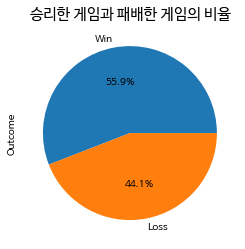

In [45]:
# 타겟의 데이터 분포 확인
df_crew['Outcome'].value_counts(normalize = True).plot.pie(autopct = "%.1f%%")
plt.title('승리한 게임과 패배한 게임의 비율', fontsize = 15)
plt.show()

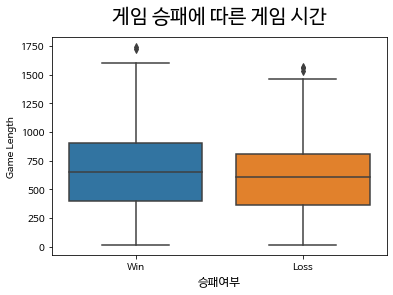

In [42]:
# Game Length 특성에 대해서 boxplot을 통해 시각화
sns.boxplot(x = 'Outcome', y = 'Game Length', data = df_crew)
plt.title('게임 승패에 따른 게임 시간', fontsize = 20, pad = 15)
plt.xlabel('승패여부', fontsize = 12)
plt.show()

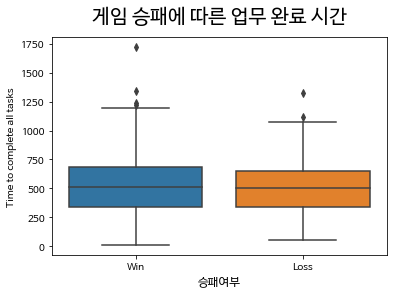

In [43]:
# Time to complete all tasks 특성에 대해서 boxplot을 통해 시각화
sns.boxplot(x = 'Outcome', y = 'Time to complete all tasks', data = df_crew)
plt.title('게임 승패에 따른 업무 완료 시간', fontsize = 20, pad = 15)
plt.xlabel('승패여부', fontsize = 12)
plt.show()

In [169]:
# 특성에 따라 승리, 패배 횟수 barplot을 그리는 함수 작성
def feature_outcome(df, target, rvs) : 
    bar_width = 0.25
    target_list = sorted(df[target].unique(), reverse = rvs)
    index = np.arange(len(target_list))
    for i in index : 
        plt.bar(i, df_crew[df_crew[target] == target_list[i]]['Outcome'].value_counts()['Win'], bar_width, alpha=0.7, color='blue')
        plt.bar(i + bar_width, df_crew[df_crew[target] == target_list[i]]['Outcome'].value_counts()['Loss'], bar_width, alpha=0.8, color='red')
    plt.xticks(np.arange(bar_width/2, len(target_list) + bar_width/2, 1), target_list)
    plt.xlabel(target, size = 13)
    plt.title(target + '에 따른 승리/패배 횟수', fontsize = 15)
    plt.legend(('Win', 'Loss'), bbox_to_anchor = (1, 1))
    plt.show()

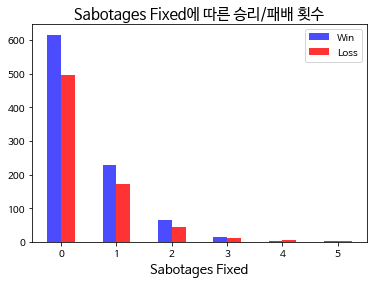

In [170]:
feature_outcome(df_crew, 'Sabotages Fixed', False)

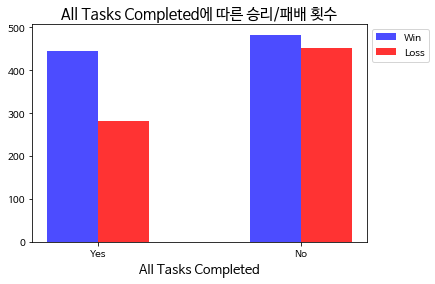

In [171]:
feature_outcome(df_crew, 'All Tasks Completed', True)

# **Part 3. 머신러닝**

In [ ]:
# 기준모델 제작

# **Part 4. ML모델 해석**